In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

In [4]:
bank_db_df = pd.read_csv("C:Desktop/Machine Learning I/Lab 1 Assignment/credit_card_default.csv")

In [5]:
print (bank_db_df.dtypes)

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object


In [6]:
# Gender (1 = male; 2 = female) 
Gender = bank_db_df.groupby('SEX')['ID'].nunique()
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
EDUCATION = bank_db_df.groupby('EDUCATION')['ID'].nunique()
# Marital status (1 = married; 2 = single; 3 = others)
MARRIAGE = bank_db_df.groupby('MARRIAGE')['ID'].nunique()
#Default Payment 1=Yes; 2=No
Default = bank_db_df.groupby('Default')['ID'].nunique()

print(Gender)
print(EDUCATION)
print(MARRIAGE)
print(Default)

SEX
1    11888
2    18112
Name: ID, dtype: int64
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: ID, dtype: int64
Default
0    23364
1     6636
Name: ID, dtype: int64


In [7]:
# Cleaning the Data on Unrepresented Variables
#Since both Education and Marrage have a others catagory we decided to include the vaules to in the other catagory since 
# we can not state the meaning of these.

bank_db_df['EDUCATION'] = bank_db_df['EDUCATION'].replace([0,5,6],4)


bank_db_df['MARRIAGE'] = bank_db_df['MARRIAGE'].replace([0],3)

#bank_db_df.EDUCATION.unique()
#bank_db_df.MARRIAGE.unique()

In [8]:
#Calculate % accounts that Defaulted (Default=1)
len(bank_db_df[bank_db_df.Default==1])/len(bank_db_df)*100


22.12

In [9]:
#Calculate % accounts that Did NOT Defaulted (Default=0)
round((len(bank_db_df[bank_db_df.Default==0])/len(bank_db_df)*100),2)

77.88

In [29]:
#Create dataset with only default accounts
Default_accts = bank_db_df[bank_db_df['Default']==1]

#Create dataset for Non-Default accounts
NonD_accts = bank_db_df[bank_db_df['Default']==0]

Citation: Drew, Jake M. “Jakemdrew/DataMiningNotebooks.” GitHub, 11 Aug. 2011, github.com/jakemdrew/DataMiningNotebooks/blob/master/02.%20DataVisualization.ipynb. 

In [11]:
#Aggregate Default column by Categorical Variables (SEX,EDUCATION,MARRIAGE)
Cat_group = Default_accts.groupby(by=['SEX','EDUCATION','MARRIAGE'])

print ('Total in Group who Defaulted:')
print (Cat_group.Default.count())
print ('---------------------------------------------------')
print ('Percentage of the Group who Defaulted:')
print (round((Cat_group.Default.sum()/bank_db_df.Default.count()*100),3)) #group percentage of total default amount which equals 22.12

Total in Group who Defaulted:
SEX  EDUCATION  MARRIAGE
1    1          1            390
                2            506
                3             10
     2          1            643
                2            746
                3             19
     3          1            303
                2            229
                3             13
     4          1             10
                2              4
2    1          1            379
                2            748
                3              3
     2          1           1023
                2            873
                3             26
     3          1            451
                2            223
                3             18
     4          1              7
                2             12
Name: Default, dtype: int64
---------------------------------------------------
Percentage of the Group who Defaulted:
SEX  EDUCATION  MARRIAGE
1    1          1           1.300
                2           1.687
       

Of all the accounts in the dataset, 22.12% defaulted (6636 total accounts). The 3.41% of married females with a university eductation who defaulted makes up the largest percentage of the defaulted group at 15.42%, while single females with a university are the second highest group to default(2.91%) accounting for 13.15% of the defaults, followed by the single female with a graduate school education default rate of 2.49% to account for 11.26% of total defaults.  

The 0.013% of the single males with an "other" education group that defaulted makes up the smallest portion of the defaulted group at 5.877e-4%, second is the married females with an "other" education group who default rate is 0.023%, followed by a tie for the third lowest default rate at 0.033% between graduated educated males with an "other" martial status and married males with an "other" education.  


Citation: Drew, Jake M. “Jakemdrew/DataMiningNotebooks.” GitHub, 11 Aug. 2011, github.com/jakemdrew/DataMiningNotebooks/blob/master/02.%20DataVisualization.ipynb. 

In [32]:
#Create summary statistics
df_sub = bank_db_df[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]
df_subd = Default_accts[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]
df_subnond = NonD_accts[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]

print (round(df_sub.describe(),2))
print ('Median values for AGE and LIMIT_BAL')
print (df_sub.median())
print('------------------------------------------------------')
print('AGE and Limit Balance on Defaulted accounts')
print (round(df_subd.describe()),2)
print ('Median values')
print (df_subd.median())
print('------------------------------------------------------')
print('AGE and Limit Balance on Non-Defaulted accounts')
print (round(df_subnond.describe(),2))
print (df_subnond.median())

            SEX  EDUCATION  MARRIAGE       AGE   LIMIT_BAL
count  30000.00   30000.00  30000.00  30000.00    30000.00
mean       1.60       1.84      1.56     35.49   167484.32
std        0.49       0.74      0.52      9.22   129747.66
min        1.00       1.00      1.00     21.00    10000.00
25%        1.00       1.00      1.00     28.00    50000.00
50%        2.00       2.00      2.00     34.00   140000.00
75%        2.00       2.00      2.00     41.00   240000.00
max        2.00       4.00      3.00     79.00  1000000.00
Median values for AGE and LIMIT_BAL
SEX               2.0
EDUCATION         2.0
MARRIAGE          2.0
AGE              34.0
LIMIT_BAL    140000.0
dtype: float64
------------------------------------------------------
AGE and Limit Balance on Defaulted accounts
          SEX  EDUCATION  MARRIAGE     AGE  LIMIT_BAL
count  6636.0     6636.0    6636.0  6636.0     6636.0
mean      2.0        2.0       2.0    36.0   130110.0
std       0.0        1.0       1.0    10.0   11

(0.0, 85.0)

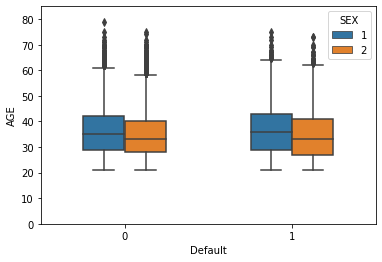

In [13]:
#Create a boxplot for the summary statistics for the categorical variables based on AGE
age_bplt = sns.boxplot(x="Default",y="AGE",hue="SEX",data=bank_db_df,
                      width=.5,)
age_bplt.set_ylim([0,85]) #set the y-axis range

Citation: “Seaborn Boxplot.” Seaborn Boxplot - Python Tutorial 

Citation: Waskom, Michael. “Seaborn.boxplot¶.” Seaborn.boxplot - Seaborn 0.11.1 Documentation, Sept. 2020, seaborn.pydata.org/generated/seaborn.boxplot.html. 

(0.0, 900000.0)

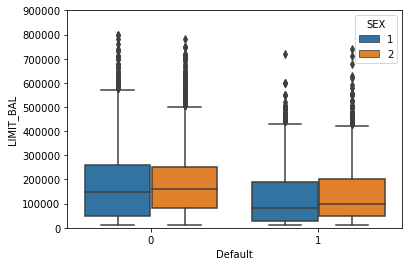

In [26]:
#Create a boxplot for the summary statistics for the categorical variables based on Limit Balance
LIMBAL_bplt = sns.boxplot(x="Default",y="LIMIT_BAL",hue="SEX",data=bank_db_df,
                      width=.80)
LIMBAL_bplt.set_ylim([0,900000])#set the y-axis range

The does appear to be heavy skewness towards old customers and higher limit balances for both sexes. The median Age, Education, and Marriage status are the same for the total group and the filtered dataset with just defaulted accounts. When grouping by SEX, the average for males appear to be higher(see boxplot above) than the average female no matter the default status. 

However, the median limit balance of $140,000 is higher than the $90,000 median limit balance for the defaulted group. Contrary to the average age between the two sex, the average limit balance for females is higher than males no matter the default status.  

E:\Anaconda3\envs\ML-7331 py3-7\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


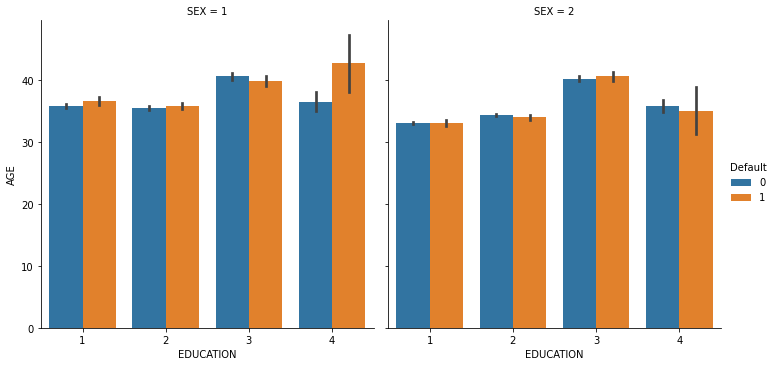

In [15]:
#Barchart for Sex, Education, and Marriage Grouped by Default
sns.factorplot(x='EDUCATION',y='AGE',hue='Default', col='SEX',
              kind='bar',data=bank_db_df)